In [0]:
spark


SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#creating for own spark session

#importing spark session from pyspark.sql

from pyspark.sql import SparkSession

#creating a spark session
my_spark_session=SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
my_spark_session

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# importing the data from the s3

ball_by_ball_df=my_spark_session.read.format("csv")\
    .option("header","true")\
    .option("inferSchema","true")\
    .load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Ball_By_Ball.csv")

In [0]:
#we can see that the above data is not properly data formated. so we can use our own schema

from pyspark.sql.types import StructType,StructField,StringType,IntegerType,BooleanType,DateType,DecimalType

In [0]:
ball_schema=StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
# importing the data from the s3

ball_by_ball_df=my_spark_session.read.format("csv")\
    .schema(ball_schema)\
    .option("header","true")\
    .load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Ball_By_Ball.csv")

In [0]:
from pyspark.sql.types import DateType, StringType, DoubleType, BooleanType

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Match.csv")


In [0]:
match_df=match_df.withColumn('match_date',to_date(col('match_date'),'M/d/yyyy').cast('date').alias('match_date'))

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", StringType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Player.csv")


In [0]:
player_df=player_df.withColumn('dob',to_date(col('dob'),'M/d/yyyy').cast('date').alias('dob'))

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", StringType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", IntegerType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", IntegerType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Player_match.csv")


In [0]:
player_match_df=player_match_df.withColumn('dob',to_date(col('dob'),'M/d/yyyy').cast('date').alias('dob'))

In [0]:
player_match_df=player_match_df.withColumn('is_manofthematch',col('is_manofthematch').cast('boolean').alias('is_manofthematch'))
player_match_df=player_match_df.withColumn('isplayers_team_won',col('isplayers_team_won').cast('boolean').alias('isplayers_team_won'))

In [0]:
player_match_df=player_match_df.filter(col('player_match_sk')!=-1)

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("/mnt/ipl_s3/raghu543-ipl-data-till-2017/Ball_By_Ball.csv")

In [0]:
# import * from pyspark.sql.functions

from pyspark.sql.functions import *

In [0]:
# Data cleaning 
# removing unwanted data from ball by ball dataset 
ball_by_ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- legbyes: integer (nullable = true)
 |-- byes: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- caught: boolean (nullable = true)
 |-- bowled: boolean (nullable = true)
 |-- run_out: boolean (nullable = true)
 |-- lbw: boolean (nullable = true)
 |-- retired_hurt: boolean (nullable = true)
 |-- stumped: boolean (nullable = true)
 |-- caught_and_bowled: boolean (null

In [0]:
new_ball_df=ball_by_ball_df.drop(col('legbyes'),col('byes'),col('caught'),col('bowled'),col('retired_hurt'),col('obstructingfeild'),col('lbw'),col('matchdatesk'),col('player_out_sk'),col('battingteam_sk'),col('bowlingteam_sk'),col('fielder_sk'),col('fielder_match_sk'),col('striker_match_sk'),col('strikersk'),col('nonstriker_match_sk'),col('nonstriker_sk'),col('bowler_match_sk'),col('bowler_sk'),col('playerout_match_sk'),col('stumped'),col('run_out'),col('caught_and_bowled'))

In [0]:
# Filter to include only valid deliveries ( excluding extras like wides and no balls)

ball_df=new_ball_df.filter((col("wides")==0) & (col("noballs")==0))

In [0]:
ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- hit_wicket: boolean (nullable = true)
 |-- bowler_wicket: boolean (nullable = true)
 |-- match_date: date (nullable = true)
 |-- season: integer (nullable = true)
 |-- striker: integer (nullable = true)
 |-- non_striker: integer (nullable = true)
 |-- bowler: integer (nullable = true)
 |-- player_out: integer (nullable = true)
 |-- fielders: inte

In [0]:
new_ball_df.filter(col('out_type')!='Not Applicable').groupBy('out_type').agg(count('out_type').alias('count')).orderBy(desc('count')).show(truncate=False)

+---------------------+-----+
|out_type             |count|
+---------------------+-----+
|caught               |3678 |
|bowled               |1382 |
|run out              |755  |
|Keeper Catch         |695  |
|lbw                  |455  |
|stumped              |243  |
|caught and bowled    |211  |
|hit wicket           |9    |
|retired hurt         |9    |
|obstructing the field|1    |
+---------------------+-----+



In [0]:
ball_cln_df=new_ball_df.withColumn('extra_type',lower(col('extra_type')))

In [0]:
ball_cln_df.filter(col('extra_type')!='no extras').groupBy('extra_type').agg(count('extra_type').alias('count')).orderBy(desc('count')).show()

+----------+-----+
|extra_type|count|
+----------+-----+
|     wides| 4575|
|   legbyes| 2590|
|   noballs|  618|
|      byes|  412|
|   penalty|    1|
+----------+-----+



In [0]:
# Aggregation : compute the total and average runs scored in each match and innings

total_avg_runs= ball_cln_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    round(avg("runs_scored"),2).alias("avg_runs")
)

In [0]:
total_avg_runs.orderBy('match_id','innings_no').show()

+--------+----------+----------+--------+
|match_id|innings_no|total_runs|avg_runs|
+--------+----------+----------+--------+
|  335987|         1|       205|    1.65|
|  335987|         2|        63|    0.62|
|  335988|         1|       234|    1.89|
|  335988|         2|       196|    1.58|
|  335989|         1|       118|    0.97|
|  335989|         2|       122|    1.26|
|  335990|         1|       154|    1.25|
|  335990|         2|       161|    1.31|
|  335991|         1|       100|    0.85|
|  335991|         2|        84|    0.69|
|  335992|         1|       162|    1.33|
|  335992|         2|       156|    1.31|
|  335993|         1|       137|    1.12|
|  335993|         2|       131|    1.58|
|  335994|         1|       190|     1.5|
|  335994|         2|       189|    1.48|
|  335995|         1|       208|    1.65|
|  335995|         2|       210|    1.72|
|  335996|         1|       175|    1.41|
|  335996|         2|       109|    0.87|
+--------+----------+----------+--

In [0]:
# Window Function: Calculate the total no.runs in each match over each over
from pyspark.sql.window import *

win=Window.partitionBy("match_id","innings_no").orderBy("over_id")

win_df=ball_cln_df.withColumn(
    "total runs per over",
    sum("runs_scored").over(win)
)

In [0]:
win_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+-------+-------------+--------------+----------+-------------+----------+------+-------+-----------+------+----------+--------+------------+-------------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|noballs|penalty|bowler_extras|      out_type|hit_wicket|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|keeper_catch|total runs per over|
+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+-------+-------------+--------------+----------+-------------+----------+------+-------+-----------+------+----------+--------+------------+-------------------+
|  335987|      1|      1|         1|           1|           2|                       1|   legbyes|          

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_cln_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
).show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+-------+-------------+--------------+----------+-------------+----------+------+-------+-----------+------+----------+--------+------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|noballs|penalty|bowler_extras|      out_type|hit_wicket|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|keeper_catch|high_impact|
+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+-------+-------------+--------------+----------+-------------+----------+------+-------+-----------+------+----------+--------+------------+-----------+
|  598028|     15|      6|         1|           5|           2|                       6| no extras|          4|         0|    0|     

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))



In [0]:
match_df.printSchema()

root
 |-- match_sk: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- match_date: date (nullable = true)
 |-- season_year: integer (nullable = true)
 |-- venue_name: string (nullable = true)
 |-- city_name: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- match_winner: string (nullable = true)
 |-- toss_name: string (nullable = true)
 |-- win_type: string (nullable = true)
 |-- outcome_type: string (nullable = true)
 |-- manofmach: string (nullable = true)
 |-- win_margin: integer (nullable = true)
 |-- country_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)



In [0]:
man_of_match_tbl=match_df.select('match_id','manofmach').groupBy('manofmach').agg(count('manofmach').alias('count')).orderBy(desc('count'))

In [0]:
man_of_match_tbl.show(man_of_match_tbl.count(),truncate=False)

+-----------------+-----+
|manofmach        |count|
+-----------------+-----+
|CH Gayle         |18   |
|YK Pathan        |16   |
|AB de Villiers   |15   |
|DA Warner        |15   |
|RG Sharma        |14   |
|SK Raina         |14   |
|G Gambhir        |13   |
|MS Dhoni         |13   |
|AM Rahane        |12   |
|MEK Hussey       |12   |
|DR Smith         |11   |
|V Sehwag         |11   |
|V Kohli          |11   |
|JH Kallis        |10   |
|SR Watson        |10   |
|KA Pollard       |9    |
|A Mishra         |9    |
|SE Marsh         |9    |
|SR Tendulkar     |8    |
|RV Uthappa       |7    |
|RA Jadeja        |7    |
|AC Gilchrist     |7    |
|AT Rayudu        |7    |
|M Vijay          |6    |
|UT Yadav         |6    |
|AD Russell       |6    |
|Harbhajan Singh  |6    |
|A Nehra          |6    |
|BJ Hodge         |6    |
|KC Sangakkara    |5    |
|B Kumar          |5    |
|SP Narine        |5    |
|DPMD Jayawardene |5    |
|SL Malinga       |5    |
|GJ Maxwell       |5    |
|Yuvraj Sing

In [0]:
# to get the remaining values as well we use window func

match_window=Window.partitionBy('manofmach')

match_win_df=match_df.withColumn('Count of manofmach', count('manofmach').over(match_window))



In [0]:
match_win_df.select('manofmach','count of manofmach').orderBy(desc('count of manofmach')).show()

+---------+------------------+
|manofmach|count of manofmach|
+---------+------------------+
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
| CH Gayle|                18|
|YK Pathan|                16|
|YK Pathan|                16|
+---------+------------------+
only showing top 20 rows



In [0]:
# find which team won more matches

match_win_df.groupBy('match_winner').agg(count('match_winner').alias('count')).orderBy(desc('count')).show(truncate=False)

+---------------------------+-----+
|match_winner               |count|
+---------------------------+-----+
|Mumbai Indians             |91   |
|Chennai Super Kings        |79   |
|Kolkata Knight Riders      |77   |
|Royal Challengers Bangalore|73   |
|Kings XI Punjab            |70   |
|Rajasthan Royals           |63   |
|Delhi Daredevils           |62   |
|Sunrisers Hyderabad        |42   |
|Deccan Chargers            |29   |
|Rising Pune Supergiants    |15   |
|Gujarat Lions              |13   |
|Pune Warriors              |12   |
|Kochi Tuskers Kerala       |6    |
|NULL                       |3    |
|tied                       |1    |
|abandoned                  |1    |
+---------------------------+-----+



In [0]:
# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
).show(1)




+--------+--------+--------------------+--------------------+----------+-----------+--------------------+---------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-----------------+-------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name|city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month|day|toss_match_winner|win_margin_category|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+---------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-----------------+-------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...|Bangalore|       India|Ro

In [0]:
# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month|day|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    ru

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name|       dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|1972-07-08| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|1981-09-27|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
player_match_df=player_match_df.drop(col('player_match_sk'),col('playermatch_id'),col('batting_status'),col('bowling_status'),col('playermatch_key'))

In [0]:
player_match_df.show(1)

+--------+---------+-----------+----------+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+
|match_id|player_id|player_name|       dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|player_captain|opposit_captain|player_keeper|opposit_keeper|
+--------+---------+-----------+----------+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+
|  335987|        6|   R Dravid|1973-01-11|Right-hand bat|Right-arm offbreak|       India|  Captain|Royal Challengers...|Kolkata Knight Ri...|       2008|           false|             35|            

In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
).show()




+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+--------------+
|match_id|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|
+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+--------------+
|  335987|        6|       R Dravid|1973-01-11|Right-hand bat|  Right-arm offbreak|       India|  Captain|Royal Challengers...|Kolkata K

In [0]:
# Dynamic column to calculate years since debut
player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
).show()

+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+-----------------+
|match_id|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|player_captain|opposit_captain|player_keeper|opposit_keeper|years_since_debut|
+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+---------------+-------------+--------------+-----------------+
|  335987|        6|       R Dravid|1973-01-11|Right-hand bat|  Right-arm offbreak|       India|  Captain|Royal Challengers...|

In [0]:
win_df.createOrReplaceTempView("ball_by_ball")
match_win_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

Exploratory Data Analysis

In [0]:
new_ball_df.filter(col('out_type')!='Not Applicable').groupBy('out_type').agg(count('out_type').alias('count')).orderBy(desc('count')).show(truncate=False)

+---------------------+-----+
|out_type             |count|
+---------------------+-----+
|caught               |3678 |
|bowled               |1382 |
|run out              |755  |
|Keeper Catch         |695  |
|lbw                  |455  |
|stumped              |243  |
|caught and bowled    |211  |
|hit wicket           |9    |
|retired hurt         |9    |
|obstructing the field|1    |
+---------------------+-----+



The table provides insights into the various methods by which batsmen are dismissed in cricket, presenting "caught" as the most frequent dismissal type with 3678 occurrences, followed by "bowled" at 1382, and "run out" at 755, indicating the commonality of fielding and bowling-related dismissals. The presence of "Keeper Catch" (695) and "stumped" (243) emphasizes the crucial role of the wicketkeeper in securing dismissals, while "lbw" (455) highlights the effectiveness of bowling strategies aimed at hitting the stumps. Additionally, dismissals such as "caught and bowled" (211), "hit wicket" (9), and "retired hurt" (9) are relatively rare, underscoring the diversity of unusual events that can occur during a cricket match. The solitary instance of "obstructing the field" further emphasizes the infrequency of dismissals resulting from rule infractions. Overall, this data provides valuable insights into the distribution and diversity of dismissal types in cricket, shedding light on the various aspects of gameplay and skill execution involved in the sport.

new_ball_df.filter(col('out_type')!='Not Applicable').groupBy('out_type').agg(count('out_type').alias('count')).orderBy(desc('count')).show(truncate=False)

In [0]:
ball_cln_df.filter(col('extra_type')!='no extras').groupBy('extra_type').agg(count('extra_type').alias('count')).orderBy(desc('count')).show()

+----------+-----+
|extra_type|count|
+----------+-----+
|     wides| 4575|
|   legbyes| 2590|
|   noballs|  618|
|      byes|  412|
|   penalty|    1|
+----------+-----+



The table presents the frequencies of different types of extras in cricket, indicating that "wides" are the most common type with 4575 occurrences, followed by "legbyes" at 2590, and "noballs" at 618, highlighting the frequency of bowling-related extras. Comparatively, "byes" (412) occur less frequently, indicating that runs scored due to the ball passing the batsman and wicketkeeper are less common than those caused by errors in line and length. The single instance of "penalty" underscores the rarity of rule infractions leading to penalty runs. This data provides valuable insights into the distribution of extra runs in cricket matches, highlighting the commonality of wides and legbyes while also emphasizing the infrequency of penalties.

ball_cln_df.filter(col('extra_type')!='no extras').groupBy('extra_type').agg(count('extra_type').alias('count')).orderBy(desc('count')).show()

In [0]:
man_of_match_tbl.show(man_of_match_tbl.count(),truncate=False)

+-----------------+-----+
|manofmach        |count|
+-----------------+-----+
|CH Gayle         |18   |
|YK Pathan        |16   |
|AB de Villiers   |15   |
|DA Warner        |15   |
|RG Sharma        |14   |
|SK Raina         |14   |
|G Gambhir        |13   |
|MS Dhoni         |13   |
|AM Rahane        |12   |
|MEK Hussey       |12   |
|DR Smith         |11   |
|V Sehwag         |11   |
|V Kohli          |11   |
|JH Kallis        |10   |
|SR Watson        |10   |
|KA Pollard       |9    |
|A Mishra         |9    |
|SE Marsh         |9    |
|SR Tendulkar     |8    |
|RV Uthappa       |7    |
|RA Jadeja        |7    |
|AC Gilchrist     |7    |
|AT Rayudu        |7    |
|M Vijay          |6    |
|UT Yadav         |6    |
|AD Russell       |6    |
|Harbhajan Singh  |6    |
|A Nehra          |6    |
|BJ Hodge         |6    |
|KC Sangakkara    |5    |
|B Kumar          |5    |
|SP Narine        |5    |
|DPMD Jayawardene |5    |
|SL Malinga       |5    |
|GJ Maxwell       |5    |
|Yuvraj Sing

The table presents the count of "Man of the Match" awards received by various players in the Indian Premier League (IPL), offering insights into the standout performers in the tournament. Notably, Chris Gayle leads the tally with 18 awards, followed closely by Yuvraj Singh, AB de Villiers, and David Warner with 15 each. This indicates their consistent contributions and match-winning performances for their respective teams over multiple seasons. Other notable players like Rohit Sharma, Suresh Raina, Gautam Gambhir, and MS Dhoni have also garnered significant recognition, showcasing their impact on the field. Additionally, the presence of players like Shane Watson, Virat Kohli, and Sunil Narine among the top performers highlights the all-round talent and versatility exhibited in the IPL. Overall, the table provides valuable insights into the individual contributions of players towards their team's success in the IPL tournament.



In [0]:

# find which team won more matches

match_win_df.groupBy('match_winner').agg(count('match_winner').alias('count')).orderBy(desc('count')).show(truncate=False)

+---------------------------+-----+
|match_winner               |count|
+---------------------------+-----+
|Mumbai Indians             |91   |
|Chennai Super Kings        |79   |
|Kolkata Knight Riders      |77   |
|Royal Challengers Bangalore|73   |
|Kings XI Punjab            |70   |
|Rajasthan Royals           |63   |
|Delhi Daredevils           |62   |
|Sunrisers Hyderabad        |42   |
|Deccan Chargers            |29   |
|Rising Pune Supergiants    |15   |
|Gujarat Lions              |13   |
|Pune Warriors              |12   |
|Kochi Tuskers Kerala       |6    |
|NULL                       |3    |
|tied                       |1    |
|abandoned                  |1    |
+---------------------------+-----+



The table provides insights into the performance of various teams in the Indian Premier League (IPL), showcasing the number of matches won by each team. From the data, we observe that "Mumbai Indians" emerge as the most successful team with 91 wins, closely followed by "Chennai Super Kings" at 79 wins, and "Kolkata Knight Riders" with 77 wins. The distribution of wins among the teams underscores the competitiveness of the IPL, with several teams achieving notable success over the years. Additionally, the presence of teams like "Deccan Chargers," "Rising Pune Supergiants," "Gujarat Lions," "Pune Warriors," and "Kochi Tuskers Kerala" reflects the league's evolution and expansion over different seasons. The occurrences of "NULL," "tied," and "abandoned" entries suggest the presence of incomplete or inconclusive matches, highlighting the various outcomes and challenges inherent in professional cricket tournaments like the IPL.


In [0]:
new_ball_df.filter(col('out_type')!='Not Applicable').groupBy('out_type').agg(count('out_type').alias('count')).orderBy(desc('count')).show(truncate=False)

+---------------------+-----+
|out_type             |count|
+---------------------+-----+
|caught               |3678 |
|bowled               |1382 |
|run out              |755  |
|Keeper Catch         |695  |
|lbw                  |455  |
|stumped              |243  |
|caught and bowled    |211  |
|hit wicket           |9    |
|retired hurt         |9    |
|obstructing the field|1    |
+---------------------+-----+



The table provides insights into the various methods by which batsmen are dismissed in cricket, presenting "caught" as the most frequent dismissal type with 3678 occurrences, followed by "bowled" at 1382, and "run out" at 755, indicating the commonality of fielding and bowling-related dismissals. The presence of "Keeper Catch" (695) and "stumped" (243) emphasizes the crucial role of the wicketkeeper in securing dismissals, while "lbw" (455) highlights the effectiveness of bowling strategies aimed at hitting the stumps. Additionally, dismissals such as "caught and bowled" (211), "hit wicket" (9), and "retired hurt" (9) are relatively rare, underscoring the diversity of unusual events that can occur during a cricket match. The solitary instance of "obstructing the field" further emphasizes the infrequency of dismissals resulting from rule infractions. Overall, this data provides valuable insights into the distribution and diversity of dismissal types in cricket, shedding light on the various aspects of gameplay and skill execution involved in the sport.



In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       616|
|    g gambhir|       2008|       534|
|st jayasuriya|       2008|       514|
|    sr watson|       2008|       468|
|     gc smith|       2008|       441|
| ac gilchrist|       2008|       436|
|    yk pathan|       2008|       435|
|     sk raina|       2008|       421|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       406|
|    rg sharma|       2008|       404|
|     r dravid|       2008|       371|
|   sc ganguly|       2008|       349|
|     s dhawan|       2008|       340|
|   rv uthappa|       2008|       320|
|kc sangakkara|       2008|       320|
|    dj hussey|       2008|       319|
|  sa asnodkar|       2008|       311|
|     pa patel|       2008|       302|
| yuvraj singh|       2008|       299|
+-------------+-----------+----------+
only showing top 20 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id,m.season_year, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()


+--------+-----------+--------------------+---------+--------------------+-------------+
|match_id|season_year|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+-----------+--------------------+---------+--------------------+-------------+
|  335987|       2008|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988|       2008| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|       2008|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|       2008|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|       2008|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|       2008|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|       2008|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|       2008|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|       2008

In [0]:
import matplotlib.pyplot as plt

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
round(AVG(b.runs_scored),2) AS avg_runs_per_ball
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball
""")
economical_bowlers_powerplay.show()


+---------------+-----------------+
|    player_name|avg_runs_per_ball|
+---------------+-----------------+
|     sm harwood|             0.32|
|        a zampa|             0.43|
|     ankit soni|              0.5|
|      gr napier|              0.5|
|       aj finch|              0.5|
|     avesh khan|              0.5|
|       nb singh|             0.56|
|     ag murtaza|             0.65|
|     fh edwards|             0.66|
|      sb bangar|             0.67|
|     d du preez|             0.67|
|        s gopal|             0.67|
|   kp pietersen|              0.7|
|  la carseldine|             0.71|
|      ss mundhe|             0.71|
|       a kumble|             0.76|
|       umar gul|             0.76|
|j syed mohammad|             0.78|
|c de grandhomme|             0.79|
|smsm senanayake|             0.83|
+---------------+-----------------+
only showing top 20 rows



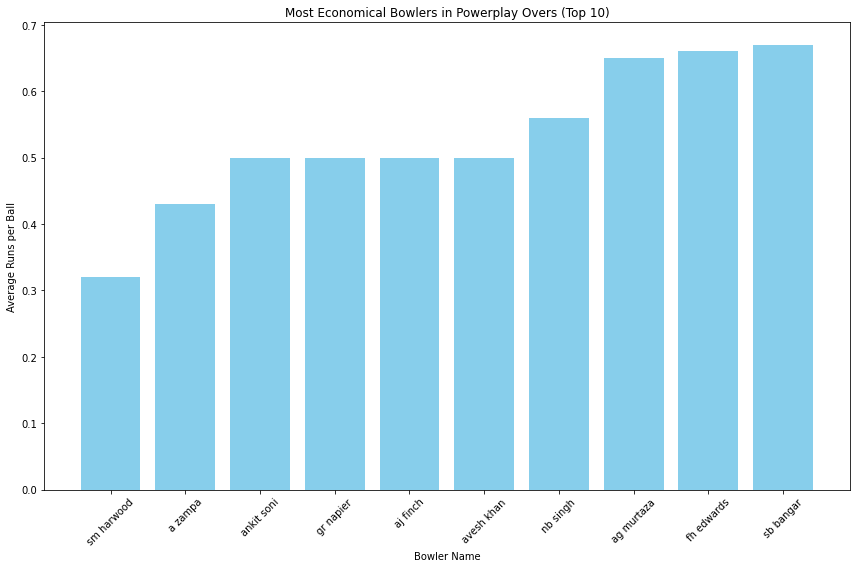

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The graph displays the average runs scored per ball by various cricket players, reflecting their batting efficiency and effectiveness in scoring runs during their innings. Players like SM Harwood, A Zampa, and Ankit Soni exhibit a comparatively lower average runs per ball, indicating a more defensive or conservative batting approach. Conversely, players such as NB Singh, AG Murtaza, and SB Bangar demonstrate higher average runs per ball, suggesting a more aggressive batting style or the ability to score quickly. This data provides insights into the batting prowess and strategies employed by different players, showcasing their contribution to their team's overall performance in cricket matches.

In [0]:
import seaborn as sns

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome,
        case m.toss_winner when 'Sunrisers Hyderabad' then 'SRH'
          when 'Chennai Super Kings' then 'CSK'
          when 'Rising Pune Supergiant' then 'RPS' 
          when 'Rising Pune Supergiants' then 'RPS'
          when 'Deccan Chargers' then 'DC'
          when 'Kochi Tuskers Kerala' then 'KTK' 
          when 'Rajasthan Royals' then 'RR'
          when 'Gujarat Lions' then 'GL'
          when 'Royal Challengers Bangalore' then 'RCB'
          when  'Kolkata Knight Riders' then 'KKR' 
          when 'Kings XI Punjab' then 'KBPS'
          when 'Pune Warriors' then 'PWI'
          when 'Delhi Daredevils' then 'DC'
          when 'Mumbai Indians' then 'MI' end as team
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()


+--------+--------------------+---------+--------------------+-------------+----+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|team|
+--------+--------------------+---------+--------------------+-------------+----+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost| RCB|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won| CSK|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|  RR|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|  MI|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|  DC|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|KBPS|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|  DC|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|  MI|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|  RR|
|  335996|      

In [0]:
spark.sql(""" 
          select distinct (toss_winner),
          case toss_winner when 'Sunrisers Hyderabad' then 'SRH'
          when 'Chennai Super Kings' then 'CSK'
          when 'Rising Pune Supergiant' then 'RPS' 
          when 'Rising Pune Supergiants' then 'RPS'
          when 'Deccan Chargers' then 'DC'
          when 'Kochi Tuskers Kerala' then 'KTK' 
          when 'Rajasthan Royals' then 'RR'
          when 'Gujarat Lions' then 'GL'
          when 'Royal Challengers Bangalore' then 'RCB'
          when  'Kolkata Knight Riders' then 'KKR' 
          when 'Kings XI Punjab' then 'KBPS'
          when 'Pune Warriors' then 'PWI'
          when 'Delhi Daredevils' then 'DC'
          when 'Mumbai Indians' then 'MI' end as team
          from match
          where toss_winner!='null'
          """).show(truncate=False)

+---------------------------+----+
|toss_winner                |team|
+---------------------------+----+
|Kolkata Knight Riders      |KKR |
|Pune Warriors              |PWI |
|Royal Challengers Bangalore|RCB |
|Mumbai Indians             |MI  |
|Delhi Daredevils           |DC  |
|Kochi Tuskers Kerala       |KTK |
|Rajasthan Royals           |RR  |
|Deccan Chargers            |DC  |
|Sunrisers Hyderabad        |SRH |
|Chennai Super Kings        |CSK |
|Kings XI Punjab            |KBPS|
|Gujarat Lions              |GL  |
|Rising Pune Supergiant     |RPS |
|Rising Pune Supergiants    |RPS |
+---------------------------+----+



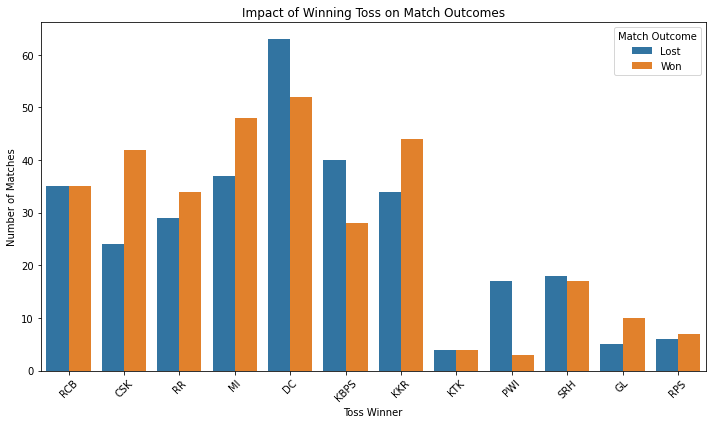

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='team', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()


+---------------+-------------------+--------------+
|    player_name|   avg_runs_in_wins|innings_played|
+---------------+-------------------+--------------+
|smsm senanayake|                0.0|             1|
|     kp appanna|                0.0|             1|
|      jj bumrah|                0.0|             3|
|       i sharma|                0.0|             1|
|       ts mills|                0.0|             3|
|        a nehra|                0.0|             2|
|       j theron|                0.0|             2|
|       vr aaron|                0.0|             5|
|      sn thakur|                0.0|             2|
|  anirudh singh|                0.0|             1|
|     t thushara|                0.2|             5|
|      sa abbott|               0.25|             4|
|  yashpal singh|                0.3|            20|
|    s sreesanth| 0.3333333333333333|             3|
|    kc cariappa| 0.3333333333333333|             3|
|     jd unadkat|                0.4|         

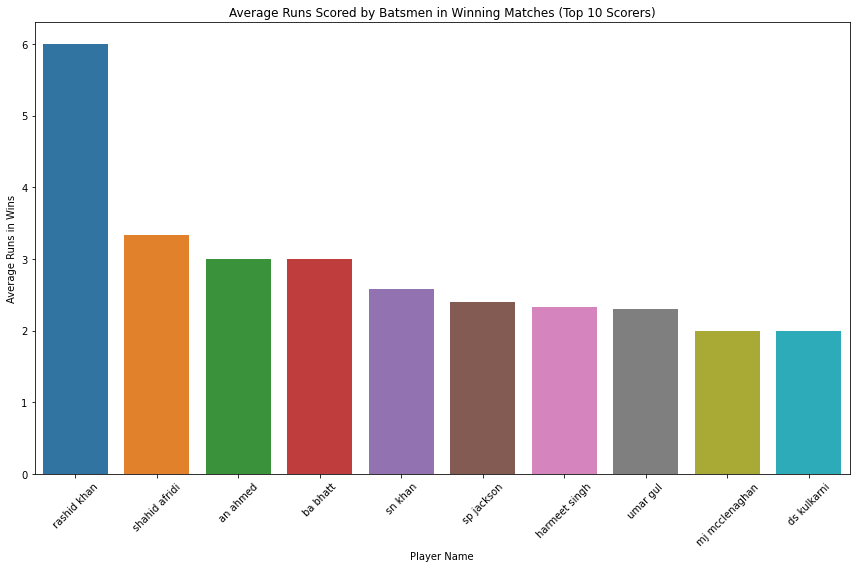

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph presents the average runs scored by cricket players in matches won, along with the number of innings played. It provides insights into the performance of players in winning matches, highlighting their contribution to their team's success. Players like Rashid Khan and Shahid Afridi exhibit higher average runs in wins, indicating their crucial role in securing victories for their teams even with limited innings played. On the other hand, players such as BA Bhatt and AN Ahmed show a moderate average runs in wins, suggesting their consistent contribution to the team's success across multiple innings. This data aids in assessing the impact of individual players in winning matches and can inform team selection and strategy in cricket.

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


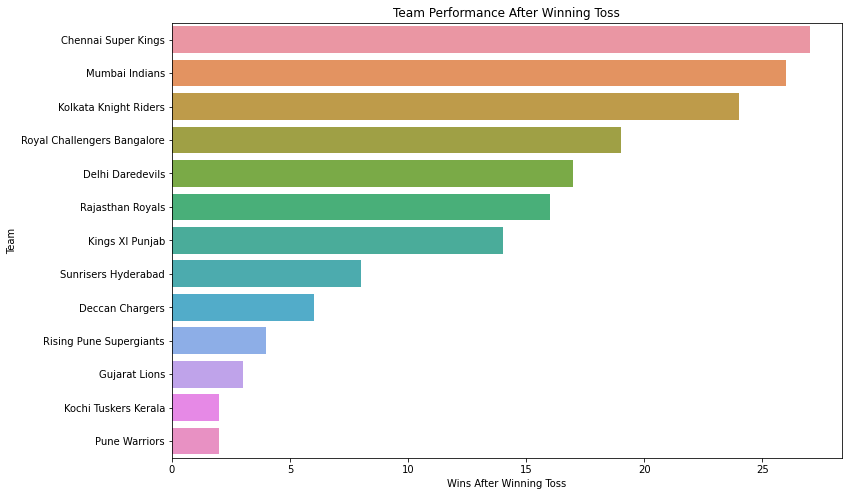

In [0]:

# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()


The barplot presents the number of wins achieved by various IPL teams after winning the toss. It illustrates the effectiveness of each team in converting the toss advantage into match victories. Chennai Super Kings lead the tally with 27 wins, closely followed by Mumbai Indians with 26 wins and Kolkata Knight Riders with 24 wins. Royal Challengers Bangalore, Delhi Daredevils, and Rajasthan Royals also demonstrate solid performances with 19, 17, and 16 wins, respectively. Conversely, teams like Rising Pune Supergiants, Gujarat Lions, Kochi Tuskers Kerala, and Pune Warriors have relatively fewer wins after winning the toss, indicating a lesser ability to capitalize on the toss advantage. This data underscores the strategic importance of the toss in cricket matches and highlights its correlation with match outcomes for IPL teams.